In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv(r'\Users\DELL\Desktop\Depi\Heart_Disease_Project\data\heart_disease_clean.csv')

In [27]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,2
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


In [29]:
X= df.drop('num', axis= 1)
y= df['num']

In [30]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [31]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [32]:
pca_df = pd.DataFrame(
    data=X_pca,
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]
)
pca_df["target"] = y

In [34]:
explained_variance = pca.explained_variance_ratio_

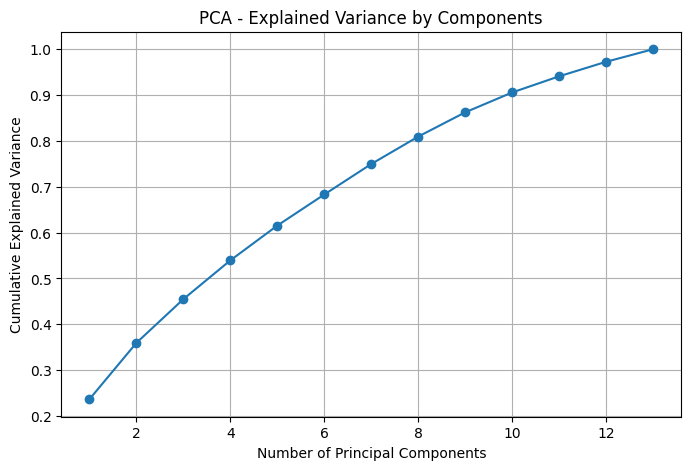

In [35]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance by Components")
plt.grid(True)
plt.show()

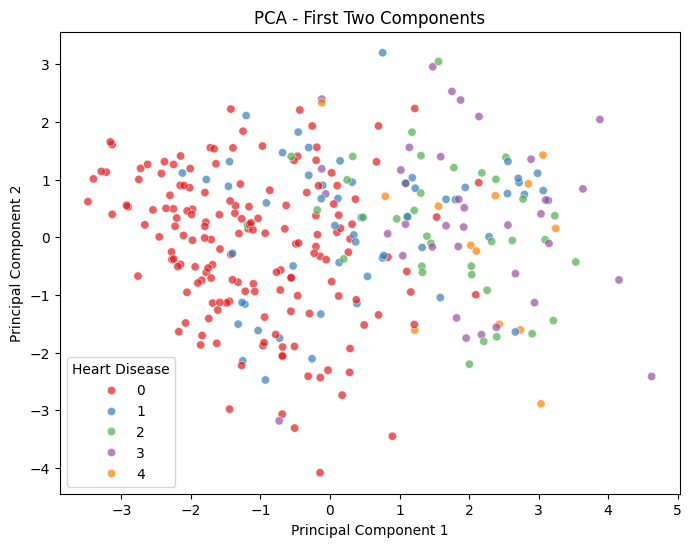

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_df["PC1"], y=pca_df["PC2"], 
    hue=pca_df["target"], palette="Set1", alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components")
plt.legend(title="Heart Disease")
plt.show()